<a href="https://colab.research.google.com/github/anitamezzetti/ML_finance/blob/main/complete%20data/generate_dataset_multiple%20maturities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
from time import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
start = time()

# model parameters
sigma = 0.61
theta = 0.019
kappa = 6.21
rho = -0.5
T1 = 10
S0 = 2

# initial conditions
# S0 
V0 = [0.01, 0.05, 0.07]

In [3]:
# option parameters
int_rates = [0, 0.05]
K = np.arange(1.6,2.4,0.2)
time_maturity = np.arange(1,5,0.2)

In [4]:
num_simulations = 2000
n = 500

Stock prices simulation:

In [5]:
def stock_price_generator (t_max, n ,m, S0, k, V0, sigma, theta, kappa, rho):
    dt = t_max / n
    
    # Brownian motions:
    dw_v = np.random.normal(size=(m, n)) * np.sqrt(dt)
    dw_i = np.random.normal(size=(m, n)) * np.sqrt(dt)

    dw_s = rho * dw_v + np.sqrt(1.0 - rho ** 2) * dw_i

    # Perform time evolution 
    s = np.empty((m, n + 1)) # initialisation stock prices vector
    s[:, 0] = S0

    v = np.ones(m) * V0

    for t in range(n):
        dv = kappa * (theta - v) * dt + sigma * np.sqrt(v) * dw_v[:, t]
        ds = r * s[:, t] * dt + np.sqrt(v) * s[:, t] * dw_s[:, t]

        v = np.clip(v + dv, a_min=0.0, a_max=None)
        s[:, t + 1] = s[:, t] + ds
      
        
    return s
    

In [6]:
def find_expected_payoff(stock_path, k, r, t_max):
    payoff = max(stock_path[-1] - k, 0) # one payoff for each simulation
    c = payoff * np.exp(-r * t_max)     # in case r=0, this step is useless
    
    return c

In [7]:
df = pd.DataFrame(columns=['price', 'stock', 'strike', 'maturity', 'initial_vol', 'interest_rates'])

In [8]:
# fill the dataset
for v0 in V0:
  print(f"vo {v0}")
  for t in time_maturity:
    for r in int_rates:
        s = stock_price_generator (t, n, num_simulations, S0, K, v0, sigma, theta, kappa, rho)

        for stock_path in s:
            p = find_expected_payoff(stock_path, K, r, t)

            new_row = {'price':p, 'stock':stock_path[T1], 'maturity':t, 'initial_vol': v0, 'interest_rates':r}
            #append row to the dataframe
            df = df.append(new_row, ignore_index=True)


vo 0.01
vo 0.05
vo 0.07


In [9]:
df.head()

,price,stock,maturity,initial_vol,interest_rates
0,0.000000,1.996405,1.0,0.01,0.0
1,0.769939,1.987071,1.0,0.01,0.0
2,0.000000,2.038951,1.0,0.01,0.0
3,0.353095,1.997544,1.0,0.01,0.0
4,0.000000,2.006776,1.0,0.01,0.0


In [10]:
zero_values = sum(x == 0 for x in df.price)
non_zeros_values = sum(x != 0 for x in df.price)

print(f"This database contains {len(df)} options. \n{zero_values} have zero value.")

This database contains 240000 options. 
96884 have zero value.


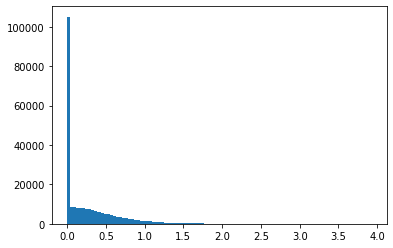

In [13]:
plt.hist(df.price, bins =100);

In [14]:
len(df)

240000

In [15]:
df.to_csv('dataset2.csv')